In [49]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = 16,8

import scipy.stats as st
import statsmodels.api as sm



In [25]:
data = pd.DataFrame({'Mileage':[15,14,17,7,10,7,20,21,18,11,7.9,8.6,12.3,17.1,19.4],
                  'Premium':[392.5,46.2,15.7,422.2,119.4,170.9,56.9,77.5,214,65.3,250,220,217.5,140.88,97.25]})

In [26]:
data.head(2)

,Mileage,Premium
0,15.0,392.5
1,14.0,46.2


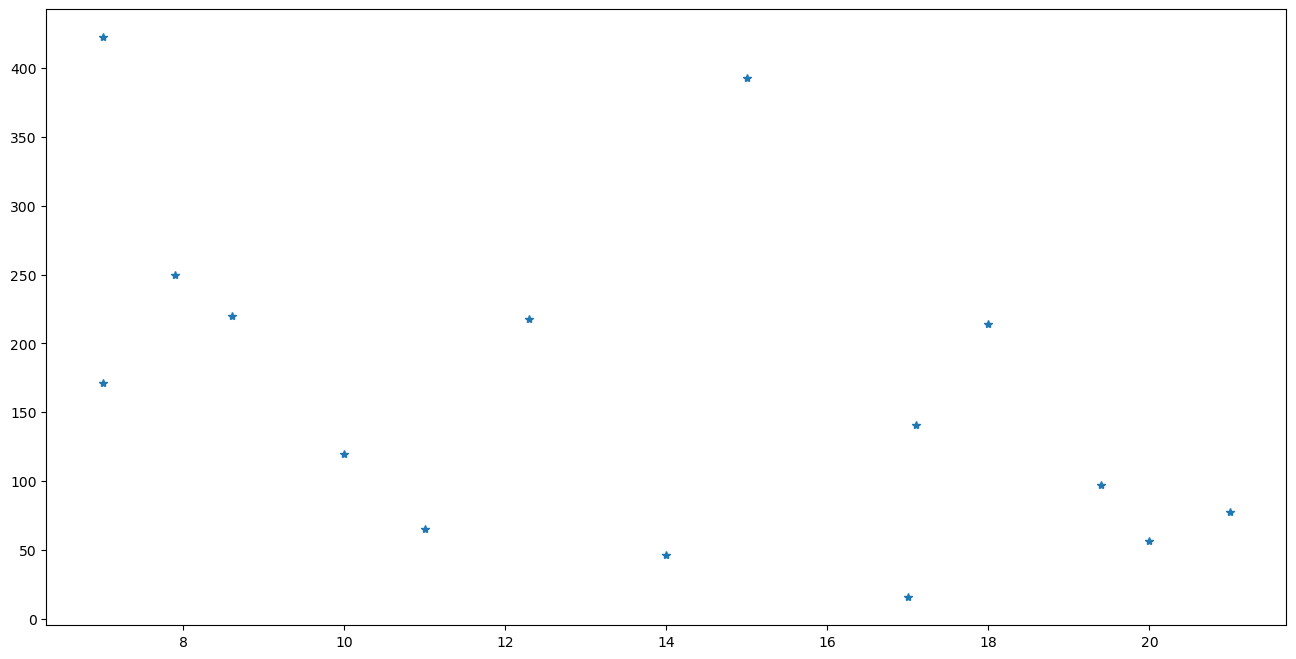

In [27]:
plt.plot(data.Mileage, data.Premium, "*")
plt.show()

In [28]:
x = data.Mileage
y = data.Premium

In [29]:
# b1 = cov(x,y)/var(x)
b1 = data.cov()/data.Mileage.var()
b1

,Mileage,Premium
Mileage,1.000000,-11.690503
Premium,-11.690503,605.543284


In [30]:
b1 = np.sum((x-x.mean()) * (y-y.mean()))/np.sum((x-x.mean())**2)
b1

-11.690503214338849

In [31]:
b0= y.mean()-b1*x.mean()
b0

327.08602066025105

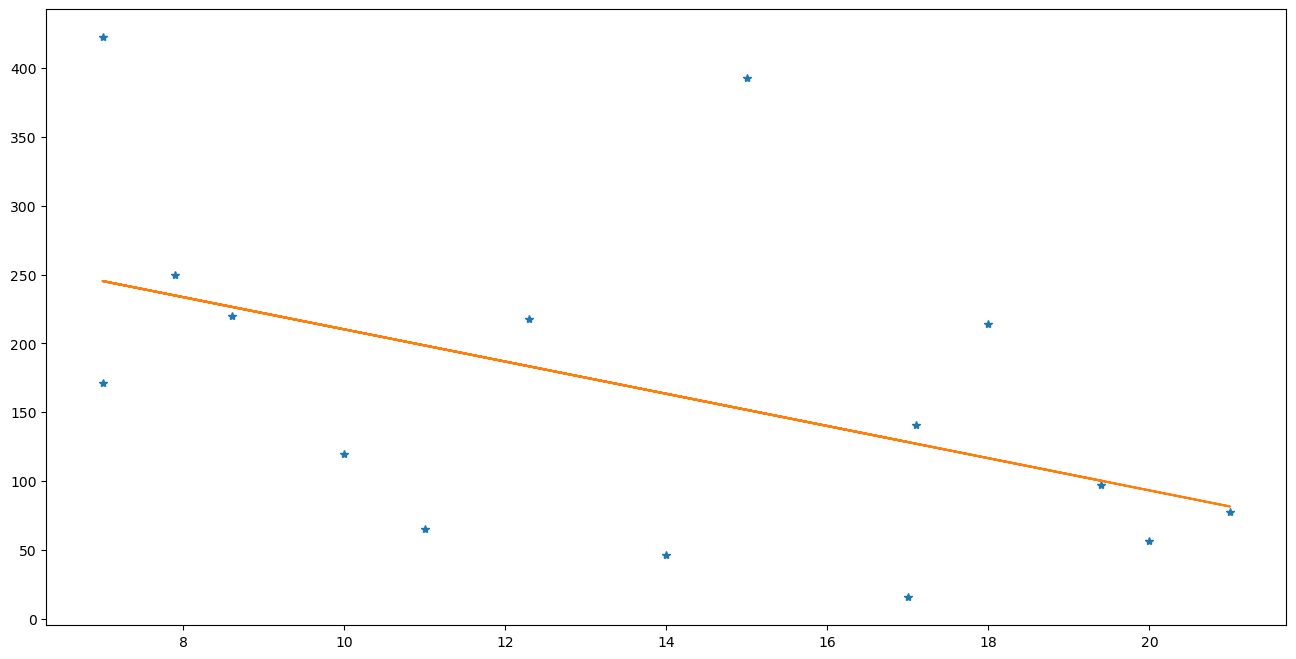

In [32]:
plt.plot(data.Mileage, data.Premium, "*")
plt.plot(data.Mileage, b0 + b1*data.Mileage)
plt.show()

In [33]:
# error , residue
yact = data.Premium
ypred = b0 + b1*data.Mileage

err = yact - ypred
np.sum(err)

-1.4210854715202004e-13

In [34]:
#SSE
sse = np.sum((yact-ypred)**2)
sse

159678.96224549576

In [35]:
# mse
mse = sse/len(data)

mse

10645.264149699717

In [36]:
rmse = np.sqrt(mse)
rmse

103.17588938167539

In [37]:
# Variance Measure
# 1. SST = Sum of square Total       sum(ymean - yact)^2 - Total Variance
# 2. SSR = Sum of Square Regression  sum(ymean-ypred)^2  - Explained Variance
# 3. SSE = Sum of Square Error       sum(ypred-yact)^2   - Unexplained Variance

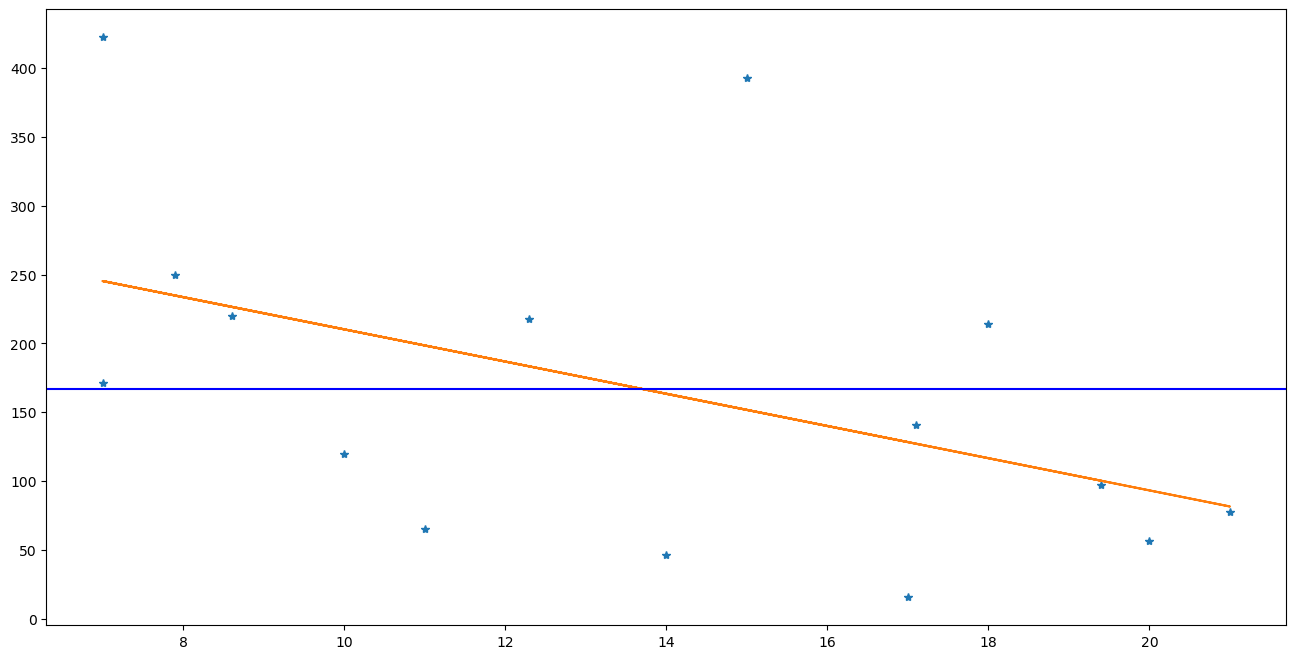

In [38]:
plt.plot(data['Mileage'],data['Premium'],'*')
plt.plot(data['Mileage'],b1*data['Mileage']+b0)
plt.axhline(data['Premium'].mean(), color='b')
plt.show()

In [39]:
sst = np.sum((yact - yact.mean())**2)
sst

206222.20604

In [40]:
ssr = np.sum((ypred - yact.mean())**2)
ssr

46543.24379450419

In [41]:
ssr+sse

206222.20603999996

In [42]:
# rsquare , oefficient of determination  gives total percentage of variation in Y that is explained by predictor variable
ssr/sst

0.22569462662753403

In [43]:
import statsmodels.api as sm

In [44]:
xc = sm.add_constant(x)
xc

,const,Mileage
0,1.0,15.0
1,1.0,14.0
2,1.0,17.0
3,1.0,7.0
4,1.0,10.0
5,1.0,7.0
6,1.0,20.0
7,1.0,21.0
8,1.0,18.0
9,1.0,11.0


In [45]:
ols = sm.OLS(y, xc)
ols_mod = ols.fit()
ols_mod.summary()

c:\Users\kumars\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Premium   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     3.789
Date:                Sun, 06 Apr 2025   Prob (F-statistic):             0.0735
Time:                        10:23:36   Log-Likelihood:                -90.831
No. Observations:                  15   AIC:                             185.7
Df Residuals:                      13   BIC:                             187.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        327.0860     87.035      3.758      0.002     139.057     515.115
Mileage      -11.6905      6.006     -1.947      0.074     -24.665       1.284
==============================================================================
Omnibus:                        3.225   Durbin-Watson:                   2.347
Prob(Omnibus):                  0.199   Jarque-Bera (JB):                1.770
Skew:                           0.841   Prob(JB):                        0.413
Kurtosis:                       3.057   Cond. No.                         44.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

const      87.035483
Mileage     6.005609
dtype: float64

✅ R² = SSR/SST → how much of the total variation in Y is explained by model

✅ Adj R² penalizes for unnecessary predictors

✅ F-stat = MST/MSE → test if at least one regressor has a non-zero coefficient

✅ If R² and Adj R² are close, it’s a good sign your variables are meaningful

✅ p-value for F-stat (Prob (F-statistic)) tells if model overall is significant


Model Fit

    R-squared: 0.226 → Only 22.6% of variation in Premium is explained by Mileage

    Adj R-squared: 0.166 → Slight drop, means model isn't overfitted, but not great either

    F-statistic: 3.789

    p-value (F-statistic): 0.0735 → borderline; >0.05 → model is not significant at 5%, maybe weak evidence at 10%


🧪 Coefficients

    Intercept (const): $327.09 → base premium when Mileage = 0

    Mileage coef: -11.69 → for every unit increase in mileage, premium drops by ~$11.7

        p-value = 0.074 → again, not quite significant at 5%, but maybe at 10% level




📌 Durbin-Watson (DW)

    Tests for autocorrelation in residuals (aka serial correlation)
    It means that a variable is correlated with its own past values.

    Range: 0 to 4

    Ideal value ~2 → means no autocorrelation

    Your value: 2.347 → ✔️ close enough, likely no autocorrelation


📌 Jarque-Bera (JB)

    Tests if residuals are normally distributed

    Uses skewness and kurtosis

    Null hypothesis: residuals are normal

    Your value: 1.77, p-value: 0.413 → ✔️ fail to reject null → residuals look normal

📌 Omnibus

    Another test for normality (combines skew & kurtosis too)

    p-value: 0.199 → ✔️ no evidence against normality


In [50]:
df = sns.load_dataset('tips')

In [51]:
st.jarque_bera(df.total_bill)

SignificanceResult(statistic=65.4791478574108, pvalue=6.044824589572461e-15)

In [52]:
st.shapiro(df.total_bill)

ShapiroResult(statistic=0.9197187941346584, pvalue=3.3245391868090786e-10)

**Linear Regression Assumptions**

    Linearity – The relationship between independent and dependent variables must be linear.

    No Autocorrelation – Residuals should not be correlated with each other.

    Normality of Residuals – Residuals should follow a normal distribution.

    No Multicollinearity – Independent variables should not be highly correlated with each other.

    Homoscedasticity – Residuals should have constant variance across all levels of the predictors.<br>
        Residuals vs. Predicted (Fitted) Values
        Good: Random scatter around 0 → ✅ homoscedastic.
        Bad: Funnel shape, curves, or increasing spread → ❌ heteroscedastic.

In [64]:
sm.stats.het_breuschpagan(ols_mod.resid, xc)

(0.3027247014465845, 0.5821792983991068, 0.2677653537042297, 0.613526566611565)

In [71]:
sm.stats.het_goldfeldquandt(data['Premium'], xc)

(0.1723719627800355, 0.9634853790273938, 'increasing')

In [74]:
ols_mod.summary()

c:\Users\kumars\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Premium   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     3.789
Date:                Sun, 06 Apr 2025   Prob (F-statistic):             0.0735
Time:                        12:18:39   Log-Likelihood:                -90.831
No. Observations:                  15   AIC:                             185.7
Df Residuals:                      13   BIC:                             187.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        327.0860     87.035      3.758      0.002     139.057     515.115
Mileage      -11.6905      6.006     -1.947      0.074     -24.665       1.284
==============================================================================
Omnibus:                        3.225   Durbin-Watson:                   2.347
Prob(Omnibus):                  0.199   Jarque-Bera (JB):                1.770
Skew:                           0.841   Prob(JB):                        0.413
Kurtosis:                       3.057   Cond. No.                         44.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**t'test**

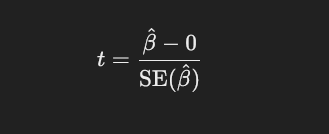

In [73]:
ols_mod.bse

const      87.035483
Mileage     6.005609
dtype: float64

In [89]:
ols_mod.params

const      327.086021
Mileage    -11.690503
dtype: float64

In [77]:
ols_mod.params['Mileage']/ols_mod.bse['Mileage']

-1.946597446425765

In [88]:
st.t.cdf(ols_mod.params['Mileage']/ols_mod.bse['Mileage'], len(data)-1)

0.03596683178410687

0.03510513597416981